## Observations and Insights 

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [152]:
df=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [153]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [154]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [155]:
# Checking the number of mice. Calculate unique number of mouse id's
# Unique function

df["Mouse ID"].nunique()

249

In [156]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Find any rows with the same mouse id 
# and timepoint
# Cleaning Data

dup_df=df[df.duplicated(["Mouse ID","Timepoint"])]
df_loss=pd.DataFrame([])

In [157]:
dup_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Drop the duplicate id & timepoint 
# (one of each leaving a single timepoint and id)

df.drop_duplicates(subset=["Mouse ID","Timepoint"])

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1888 rows x 8 columns]

In [159]:
#df.sort('C').drop_duplicates(subset=['A', 'B'], take_last=True)

In [160]:
# Checking the number of mice in the clean DataFrame. Calculate the number of unique mouse ids. Should be the same as before.
df["Mouse ID"].nunique()

249

## Summary Statistics

In [161]:
dregimen = df[df_loss]

mean_numpy = np.mean(dregimen)
median_numpy = np.median(dregimen)
mode_scipy = sts.mode(dregimen)

dregimen.head()

Mouse ID Drug Regimen  Sex  Age_months  Weight (g)  Timepoint  \
0      NaN          NaN  NaN         NaN         NaN        NaN   
1      NaN          NaN  NaN         NaN         NaN        NaN   
2      NaN          NaN  NaN         NaN         NaN        NaN   
3      NaN          NaN  NaN         NaN         NaN        NaN   
4      NaN          NaN  NaN         NaN         NaN        NaN   

   Tumor Volume (mm3)  Metastatic Sites  
0                 NaN               NaN  
1                 NaN               NaN  
2                 NaN               NaN  
3                 NaN               NaN  
4                 NaN               NaN

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
# One line to calculate the mean, one line to calculate median, etc.

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Put mean, median, etc. into new dataframe.

##df

mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

#median = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#median
#then assign the mean to a variable

#Create dataframe from 5 series
#see exploring pandas how to create a dataframe in lesson 4

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [163]:
median = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [164]:
mode = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mode()
mode

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [165]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
# Do the same as the cell above but do this in a single line. Use .agg method
# This method produces everything in a single groupby function

#summary_df - groupby

## Bar and Pie Charts

In [166]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Sum of all mice on compolamine drug alive at time point 0 + all mice alive at time point 5, (+ all time points). 
# Using pd.plot (pandas method) so if mouse a is alive all nine timepoints, then he will count nine times.




<BarContainer object of 1893 artists>

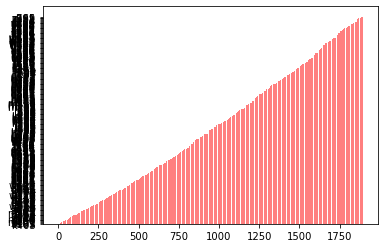

In [167]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice = df["Mouse ID"]
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color='r', alpha=0.5, align="center")

In [168]:
Sex = df["Sex"].count()

In [169]:
raw_dict = {"Sex": [Sex]}
analysis_df = pd.DataFrame(raw_dict)

analysis_df

Sex
0  1893

In [170]:
mouse_by_sex = df['Sex'].value_counts()
mouse_by_sex_df = pd.DataFrame(mouse_by_sex)

In [171]:
# Display the total number of mice by sex
number_of_mice = df.count()[0]
sex_totals = df["Sex"].value_counts()
sex_percents = sex_totals / number_of_mice
sex_demographics = pd.DataFrame({"Total Count": sex_totals, "Percentage of Mice": sex_percents})

sex_demographics

Total Count  Percentage of Mice
Male            958            0.506075
Female          935            0.493925

In [172]:
df.groupby(["Male", "Female"]).sum().plot(kind="pie", y="Sex")

KeyError: 'Male'

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = df["Sex"]

# The colors of each section of the pie chart
colors = ["red", "blue"]

explode = (0.1, 0)
       

ValueError: could not convert string to float: 'Male'

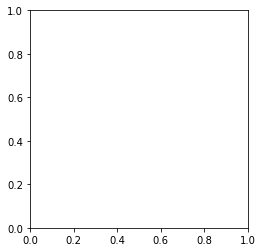

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [176]:
# Create dataframe to store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_mean_df = (pd.mouse_metadata.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
tumor_response_mean_df = tumor_response_mean_df.reset_index()
# Preview DataFrame
tumor_response_mean_df.head()

AttributeError: module 'pandas' has no attribute 'mouse_metadata'

In [178]:
df = pd.DataFrame({	Tumor Volume (mm3)"": ["a", "b", "c"], "Mouse ID": [3, 2, 1]})

column = df["Mouse ID"]
max_value = column.max()

SyntaxError: invalid syntax (<ipython-input-178-daf4046966ec>, line 1)

In [180]:
# Create dataframe to store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_mean_df = pd.DataFrame(clean_study_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
tumor_response_mean_df = tumor_response_mean_df.reset_index()
# Preview DataFrame
tumor_response_mean_df.head()

NameError: name 'clean_study_data' is not defined

In [179]:
tumor_response_mean_df = tumor_response_mean_df.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')
tumor_response_error_df = tumor_response_error_df.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')
# Preview that Reformatting worked
display(tumor_response_mean_df)
display(tumor_response_error_df)

tumor_response_mean_df.dtypes

NameError: name 'tumor_response_mean_df' is not defined

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Tumor value for last timepoint mouse was alive


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Step 1 - find the greatest time point for each mouse ID -> create a dataframe w/ mouse id and timepoint
#Step 2 - merge new dataframe (call it max_df) with original dataframe - merge on mouse id and timepoint - name it merged_df
#Step 3 - get the merged data for each of the 4 treatment from the merged_df


In [14]:
# Find IQR and outliers for each treatment
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest. 
# All four boxes in one with the red dot outlier


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Choose mouse number 1509

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Same chart with a regression line